# Social Media Computing: Assignment

## Title: Apple Iphone Reviews Sentiment Analysis

| Members                         |Student ID  |
|---------------------------------|------------|
| Aqra Alisa binti Rashidi        | 1211103093 |
| Nurul Aqilah binti Mohd Shariff | 1211103097 |


### 1. Data Cleaning

In [1]:
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

    csv_path = '/content/drive/MyDrive/iphone.csv'
else:
    csv_path = 'iphone.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv(csv_path)
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [3]:
df.shape

(3062, 11)

In [4]:
# Check for any missing values

df.isna().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


In [5]:
# Remove missing values

df = df.dropna()
df.isna().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,0
reviewUrl,0
reviewedIn,0
variant,0


In [6]:
# Check for any dupllicates observations

df.duplicated().sum()

0

In [7]:
# remove unnecessary columns

print(df['reviewUrl'].unique())

['https://www.amazon.in/gp/customer-reviews/R345SEIPU4N2XD/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98'
 'https://www.amazon.in/gp/customer-reviews/R2HJRJW7MRIVNL/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98'
 'https://www.amazon.in/gp/customer-reviews/R3Y7TPOGMY40P/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98'
 ...
 'https://www.amazon.in/gp/customer-reviews/R2C76FGTFPCPQ3/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G99CW2N'
 'https://www.amazon.in/gp/customer-reviews/R3K08TT72E7JX9/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G99CW2N'
 'https://www.amazon.in/gp/customer-reviews/R2QOYJWEPWA1ZA/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G99CW2N']


In [8]:
print(df['reviewedIn'].unique())

['Reviewed in India on 11 August 2024'
 'Reviewed in India on 16 August 2024' 'Reviewed in India on 14 May 2024'
 ... 'Reviewed in India on 16 June 2022'
 'Reviewed in India on 14 October 2022'
 'Reviewed in India on 24 February 2022']


In [9]:
print(df['variantAsin'].unique())

['B09G9BQS98' 'B09G9HRYFZ' 'B09G93H3BR' 'B09V4MXBSN' 'B09G9FPGTN'
 'B09G9BFKZN' 'B09V4B6K53' 'B09G9D8KRQ' 'B09G9HD6PD' 'B09G99CW2N'
 'B09G9BL5CP' 'B09G9HDN4Q' 'B09P81ZFKS' 'B09P825KSP' 'B09P83DFT5'
 'B09P81ZM5X' 'B09P81HWJG' 'B09P82T3PZ' 'B09P82GYVF' 'B0BJ6QXHDJ'
 'B09P82RZJ7' 'B09P82WL53' 'B09P82M739' 'B09P81SW94' 'B09P82MT2B'
 'B09G91L347' 'B09G9DZFQ7' 'B09G9G1TTR' 'B09G9G5D68' 'B09G94PDVL'
 'B09G937QLL' 'B09G98MBX1' 'B09G9J5JZX' 'B0CHX3TW6X' 'B0CHX7NG26'
 'B0CHX4CRND' 'B0CHX41VNZ' 'B0CHX6NQMD' 'B0CHX8JCXN' 'B0CHXB1PT6'
 'B0CHX1W1XY' 'B0CHX6N27Y' 'B0CHX2WQLX' 'B0CHX2F5QT' 'B0BDJ1B1CS'
 'B0BDK62PDX' 'B0BDJ6N5D6' 'B0BDJB5KHG' 'B0BDJH3V3Q' 'B0BDK8LKPJ'
 'B0BDJBXLSJ' 'B0BDJGX2XZ' 'B0BDHX8Z63' 'B0BDJYHP2H' 'B0BDHY3LFJ'
 'B0BDJ213TX' 'B0BXQ2V3NJ' 'B0BN6ZKHB9' 'B0BN7D3K67' 'B0BN7F2TY5'
 'B0BN71LR2M' 'B0BN6YDLRP' 'B0BN752KC4' 'B0BN72FYFG' 'B0BN71NXTX'
 'B0CG87H266' 'B0BN72J9M5' 'B0BN71W16B' 'B0BN7D8XBT' 'B0BN733951'
 'B0BN71R51J' 'B0BN6YVG4Y' 'B0BN71LWF2' 'B0BN73VMBR' 'B0BN7CXGWG'
 'B0BN71KR

In [10]:
print(df['productAsin'].unique())

['B09G9BL5CP' 'B09P82T3PZ' 'B09G9J5JZX' 'B0CHX1W1XY' 'B0BDK8LKPJ'
 'B0BN72MLT2' 'B09G9D8KRQ']


In [11]:
df = df.drop(['reviewUrl', 'reviewedIn', 'variantAsin', 'productAsin'], axis=1)

In [12]:
# feature engineering
# combine columns (reviewTitle & reviewDescription)

df['review'] = df['reviewTitle'] + ' ' + df['reviewDescription']
df = df.drop(['reviewTitle', 'reviewDescription'], axis=1)

print(df['review'])

0       No charger Every thing is good about iPhones, ...
1       iPhone 13 256GB It look so fabulous, I am andr...
2       Flip camera option nill I tried to flip camera...
3                                    Product 100% genuine
4       Good product Happy to get the iPhone 13 in Ama...
                              ...                        
3057    Very bad experience with i phone 13 Useless ph...
3058    not happy with this apple product iam not happ...
3059                                Good phone Good phone
3060    Battery discharge While charging mobile it's g...
3061    Batter power needs to be improved Battery powe...
Name: review, Length: 2960, dtype: object


In [13]:
print(df['variant'].unique())

['Colour: MidnightSize: 256 GB' 'Colour: PinkSize: 256 GB'
 'Colour: BlueSize: 256 GB' 'Colour: GreenSize: 256 GB'
 'Colour: PinkSize: 128 GB' 'Colour: StarlightSize: 256 GB'
 'Colour: GreenSize: 128 GB' 'Colour: StarlightSize: 128 GB'
 'Colour: MidnightSize: 128 GB' 'Colour: (PRODUCT) REDSize: 128 GB'
 'Colour: BlueSize: 128 GB' 'Colour: (PRODUCT) REDSize: 256 GB'
 'Size: 256GBColor: (Product) RED' 'Size: 256GBColor: Pink'
 'Size: 256GBColor: Midnight' 'Size: 128GBColor: Pink'
 'Size: 128GBColor: blue' 'Size: 128GBColor: starlight'
 'Size: 128GBColor: Midnight' 'Size: 128GBColor: green'
 'Size: 128GBColor: (Product) RED' 'Size: 256GBColor: starlight'
 'Size: 256GBColor: blue' 'Size: 512GBColor: starlight'
 'Size: 512GBColor: (Product) RED' 'Size: 512 GBColour: Midnight'
 'Size: 128 GBColour: Blue' 'Size: 128 GBColour: Red'
 'Size: 256 GBColour: Red' 'Size: 512 GBColour: Red'
 'Size: 512 GBColour: Pink' 'Size: 512 GBColour: Blue'
 'Size: 256 GBColour: Midnight' 'Colour: YellowSize: 128

In [14]:
import re

# Improved color extractor
def extract_color(variant):
    match = re.search(r'(?:Color|Colour):\s*([A-Za-z\s()]+)', variant, re.IGNORECASE)
    return match.group(1).strip().title() if match else None

# Improved size extractor
def extract_size(variant):
    match = re.search(r'Size:\s*(\d+\s*GB)', variant, re.IGNORECASE)
    return re.sub(r'\s+', '', match.group(1)) if match else None

# Apply extraction
df['color'] = df['variant'].apply(extract_color)
df['size'] = df['variant'].apply(extract_size)

# Strip whitespace and fix case
df['color'] = df['color'].str.strip().str.title()
df['size'] = df['size'].str.replace(' ', '').str.upper()

In [15]:
import re

def clean_color(color):
    if pd.isna(color):
        return None
    # Remove 'size', 'product', parentheses, and extra spaces
    color = re.sub(r'\(Product\)', '', color, flags=re.IGNORECASE)
    color = re.sub(r'size', '', color, flags=re.IGNORECASE)
    color = re.sub(r'\s+', ' ', color)  # replace multiple spaces with one
    return color.strip().title()

# Apply to color column
df['color'] = df['color'].apply(clean_color)

In [16]:
df["raw_text"] = df["review"]

In [17]:
# Assign sentiment label
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["ratingScore"].apply(label_sentiment)

In [18]:
df.head()

,country,date,isVerified,ratingScore,variant,review,color,size,raw_text,sentiment
0,India,11-08-2024,True,4,Colour: MidnightSize: 256 GB,"No charger Every thing is good about iPhones, ...",Midnight,256GB,"No charger Every thing is good about iPhones, ...",positive
1,India,16-08-2024,True,5,Colour: MidnightSize: 256 GB,"iPhone 13 256GB It look so fabulous, I am andr...",Midnight,256GB,"iPhone 13 256GB It look so fabulous, I am andr...",positive
2,India,14-05-2024,True,4,Colour: MidnightSize: 256 GB,Flip camera option nill I tried to flip camera...,Midnight,256GB,Flip camera option nill I tried to flip camera...,positive
3,India,24-06-2024,True,5,Colour: MidnightSize: 256 GB,Product 100% genuine,Midnight,256GB,Product 100% genuine,positive
4,India,18-05-2024,True,5,Colour: MidnightSize: 256 GB,Good product Happy to get the iPhone 13 in Ama...,Midnight,256GB,Good product Happy to get the iPhone 13 in Ama...,positive


### 2. Data Pre-processing

- Lowercase texts
- Remove punctuation & Special Characters
- Tokenization
- Stopword Removal
- Stemming
- Rejoin Tokens

In [19]:
pip install nltk

In [20]:
# Lowercase

df['cleaned_review'] = df['review'].str.lower()
print(df['cleaned_review'])

0       no charger every thing is good about iphones, ...
1       iphone 13 256gb it look so fabulous, i am andr...
2       flip camera option nill i tried to flip camera...
3                                    product 100% genuine
4       good product happy to get the iphone 13 in ama...
                              ...                        
3057    very bad experience with i phone 13 useless ph...
3058    not happy with this apple product iam not happ...
3059                                good phone good phone
3060    battery discharge while charging mobile it's g...
3061    batter power needs to be improved battery powe...
Name: cleaned_review, Length: 2960, dtype: object


In [21]:
# remove punctuation and special characters

import re
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
print(df['cleaned_review'])

0       no charger every thing is good about iphones t...
1       iphone 13 256gb it look so fabulous i am andro...
2       flip camera option nill i tried to flip camera...
3                                     product 100 genuine
4       good product happy to get the iphone 13 in ama...
                              ...                        
3057    very bad experience with i phone 13 useless ph...
3058    not happy with this apple product iam not happ...
3059                                good phone good phone
3060    battery discharge while charging mobile its ge...
3061    batter power needs to be improved battery powe...
Name: cleaned_review, Length: 2960, dtype: object


In [22]:
# tokenization

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

df['tokens'] = df['cleaned_review'].apply(word_tokenize)
print(df['tokens'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0       [no, charger, every, thing, is, good, about, i...
1       [iphone, 13, 256gb, it, look, so, fabulous, i,...
2       [flip, camera, option, nill, i, tried, to, fli...
3                                 [product, 100, genuine]
4       [good, product, happy, to, get, the, iphone, 1...
                              ...                        
3057    [very, bad, experience, with, i, phone, 13, us...
3058    [not, happy, with, this, apple, product, iam, ...
3059                           [good, phone, good, phone]
3060    [battery, discharge, while, charging, mobile, ...
3061    [batter, power, needs, to, be, improved, batte...
Name: tokens, Length: 2960, dtype: object


In [23]:
# stopword removal

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(lambda tokens: [w for w in tokens if w not in stop_words])
print(df['tokens'])

0       [charger, every, thing, good, iphones, theres,...
1       [iphone, 13, 256gb, look, fabulous, android, u...
2       [flip, camera, option, nill, tried, flip, came...
3                                 [product, 100, genuine]
4       [good, product, happy, get, iphone, 13, amazon...
                              ...                        
3057    [bad, experience, phone, 13, useless, phon, ne...
3058    [happy, apple, product, iam, happy, product, c...
3059                           [good, phone, good, phone]
3060    [battery, discharge, charging, mobile, getting...
3061    [batter, power, needs, improved, battery, powe...
Name: tokens, Length: 2960, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(w) for w in tokens])
print(df['tokens'])

0       [charger, everi, thing, good, iphon, there, no...
1       [iphon, 13, 256gb, look, fabul, android, user,...
2       [flip, camera, option, nill, tri, flip, camera...
3                                  [product, 100, genuin]
4       [good, product, happi, get, iphon, 13, amazon,...
                              ...                        
3057    [bad, experi, phone, 13, useless, phon, never,...
3058    [happi, appl, product, iam, happi, product, ch...
3059                           [good, phone, good, phone]
3060    [batteri, discharg, charg, mobil, get, hot, ev...
3061    [batter, power, need, improv, batteri, power, ...
Name: tokens, Length: 2960, dtype: object


In [25]:
# rejoin tokens into 'cleaned_review' and drop 'tokens'

df['cleaned_review'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))
df  = df.drop(['tokens'], axis=1)

In [26]:
df.head()

,country,date,isVerified,ratingScore,variant,review,color,size,raw_text,sentiment,cleaned_review
0,India,11-08-2024,True,4,Colour: MidnightSize: 256 GB,"No charger Every thing is good about iPhones, ...",Midnight,256GB,"No charger Every thing is good about iPhones, ...",positive,charger everi thing good iphon there noth comp...
1,India,16-08-2024,True,5,Colour: MidnightSize: 256 GB,"iPhone 13 256GB It look so fabulous, I am andr...",Midnight,256GB,"iPhone 13 256GB It look so fabulous, I am andr...",positive,iphon 13 256gb look fabul android user switch ...
2,India,14-05-2024,True,4,Colour: MidnightSize: 256 GB,Flip camera option nill I tried to flip camera...,Midnight,256GB,Flip camera option nill I tried to flip camera...,positive,flip camera option nill tri flip camera record...
3,India,24-06-2024,True,5,Colour: MidnightSize: 256 GB,Product 100% genuine,Midnight,256GB,Product 100% genuine,positive,product 100 genuin
4,India,18-05-2024,True,5,Colour: MidnightSize: 256 GB,Good product Happy to get the iPhone 13 in Ama...,Midnight,256GB,Good product Happy to get the iPhone 13 in Ama...,positive,good product happi get iphon 13 amazon offer


### 3. Data Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["sentiment_encoded"] = le.fit_transform(df['sentiment'])  #will be 0=negative, 1=neutral, 2=positive
print(le.classes_)

['negative' 'neutral' 'positive']


### 4. Data Splitting

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment_encoded']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Traditional ML Models

#### 5.1 Logistic Regression

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       152
           1       1.00      0.04      0.07        57
           2       0.82      0.98      0.89       383

    accuracy                           0.82       592
   macro avg       0.88      0.58      0.57       592
weighted avg       0.84      0.82      0.78       592



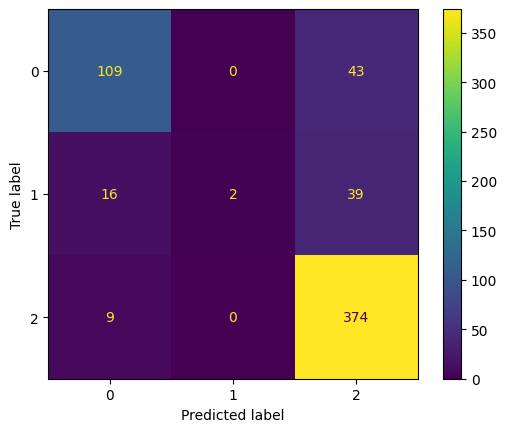

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr1= lr.fit(X_train, y_train)
y_pred_lr = lr1.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_lr).plot();

#### 5.2 Logistic Regression Tuning

In [31]:
pip install numpy==1.26.4

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Logistic Regression After Tuning:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       152
           1       0.53      0.33      0.41        57
           2       0.86      0.93      0.89       383

    accuracy                           0.82       592
   macro avg       0.72      0.66      0.68       592
weighted avg       0.80      0.82      0.81       592



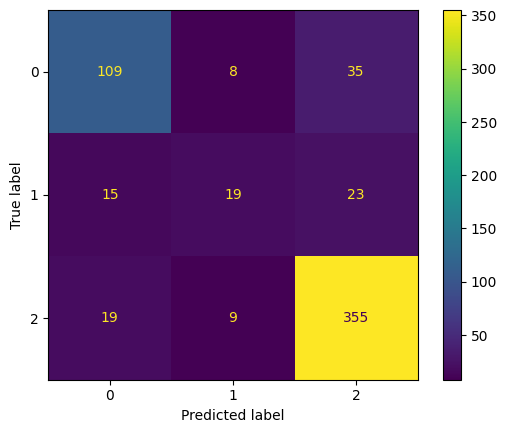

In [32]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

randomizedsearch = RandomizedSearchCV(lr, hyperparameters)
lr2 = randomizedsearch.fit(X_train, y_train)
best_lr = lr2.best_estimator_
y_pred_lr2 = lr2.predict(X_test)
print("Logistic Regression After Tuning:")
print(classification_report(y_test, y_pred_lr2))

conf_mat_lr2 = confusion_matrix(y_test, y_pred_lr2)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_lr2).plot();

#### 5.3 Support Vector Machine

SVM:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       152
           1       1.00      0.16      0.27        57
           2       0.83      0.99      0.90       383

    accuracy                           0.84       592
   macro avg       0.90      0.62      0.65       592
weighted avg       0.86      0.84      0.81       592



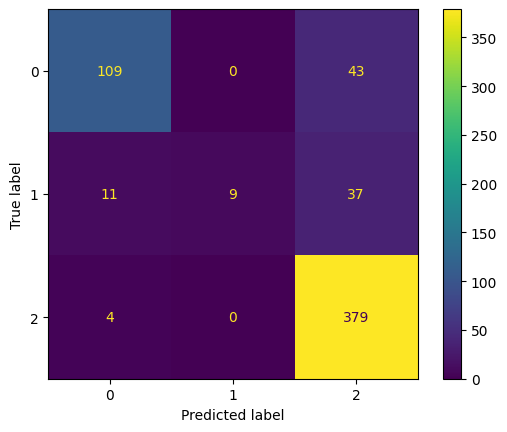

In [33]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:")
print(classification_report(y_test, y_pred_svm))

conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_svm).plot();

#### 5.4 Support Vector Machine Tuning

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVM After Tuning:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       152
           1       1.00      0.26      0.42        57
           2       0.85      0.97      0.91       383

    accuracy                           0.85       592
   macro avg       0.90      0.67      0.71       592
weighted avg       0.86      0.85      0.83       592



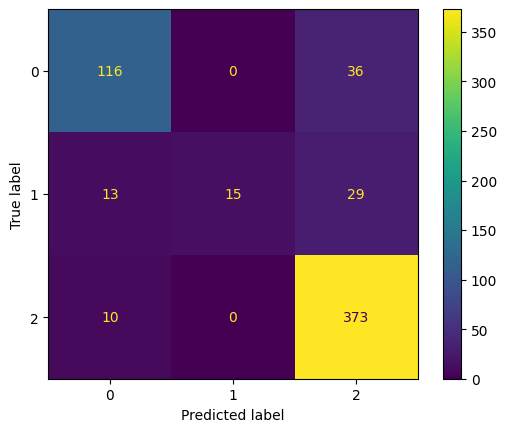

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf', 'poly'],'gamma': ['scale', 'auto']
}

# Initialize base SVM model
grid_svm= GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Predict using best model
best_svm = grid_svm.best_estimator_
y_pred_svm2 = best_svm.predict(X_test)

# Evaluate
print("SVM After Tuning:")
print(classification_report(y_test, y_pred_svm2))

conf_mat_svm2 = confusion_matrix(y_test, y_pred_svm2)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_svm2).plot();

#### 5.5 Random Forest

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       152
           1       1.00      0.23      0.37        57
           2       0.83      0.98      0.90       383

    accuracy                           0.84       592
   macro avg       0.89      0.64      0.68       592
weighted avg       0.85      0.84      0.81       592



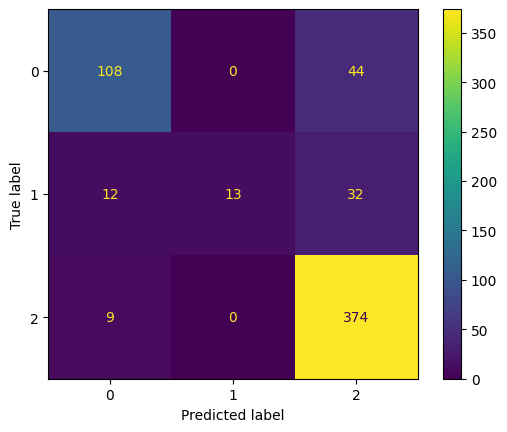

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf1 = rf.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf1))

conf_mat_rf1 = confusion_matrix(y_test, y_pred_rf1)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_rf1).plot();

#### 5.6 Random Forest Tuning

Random Forest After Tuning:
              precision    recall  f1-score   support

           0       0.90      0.39      0.55       152
           1       1.00      0.05      0.10        57
           2       0.73      0.99      0.84       383

    accuracy                           0.75       592
   macro avg       0.88      0.48      0.50       592
weighted avg       0.80      0.75      0.70       592



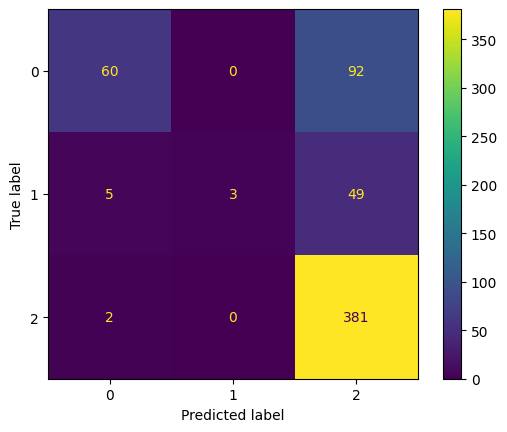

In [36]:
from scipy.stats import randint

hype_range_rf1 = {'n_estimators' : randint(50,500), 'max_depth' : randint(1,20)}
srch_hype_forest1 = RandomizedSearchCV(rf, param_distributions = hype_range_rf1, n_iter = 30, cv = 5)
srch_hype_forest1.fit(X_train, y_train)
best_RForest1 = srch_hype_forest1.best_estimator_
y_predforest = best_RForest1.predict(X_test)

# Evaluate
print("Random Forest After Tuning:")
print(classification_report(y_test, y_predforest))

conf_mat_rf2 = confusion_matrix(y_test, y_predforest)
ConfusionMatrixDisplay(confusion_matrix = conf_mat_rf2).plot();


In [37]:
from sklearn.metrics import classification_report

#For Logistic Regression
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_lr_aft_tuning = classification_report(y_test, y_pred_lr2, output_dict=True)

# For SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_aft_tuning = classification_report(y_test, y_pred_svm2, output_dict=True)

# For Random Forest
report_rf = classification_report(y_test, y_pred_rf1, output_dict=True)
report_rf_aft_tuning = classification_report(y_test, y_predforest, output_dict=True)

In [38]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Define k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# Logistic Regression (After Tuning)
cv_results_lr = cross_validate(best_lr, X_train, y_train, cv=cv, scoring=scoring)
# SVM (After Tuning)
cv_results_svm = cross_validate(best_svm, X_train, y_train, cv=cv, scoring=scoring)
# Random Forest (After Tuning)
cv_results_rf = cross_validate(best_RForest1, X_train, y_train, cv=cv, scoring=scoring)

### Transformers: DistilBERT

In [39]:
pip install transformers datasets scikit-learn torch

In [40]:
print(df.columns)

Index(['country', 'date', 'isVerified', 'ratingScore', 'variant', 'review',
       'color', 'size', 'raw_text', 'sentiment', 'cleaned_review',
       'sentiment_encoded'],
      dtype='object')


In [41]:
# convert df to hugging face dataset

from datasets import Dataset

dataset = Dataset.from_pandas(df[['cleaned_review', 'sentiment_encoded']])
dataset = dataset.rename_columns({'cleaned_review': 'text', 'sentiment_encoded': 'label'})

dataset = dataset.train_test_split(test_size=0.2)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2368
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 592
    })
})


In [42]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text", "__index_level_0__"])
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")
tokenized_dataset.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/2368 [00:00<?, ? examples/s]

Map:   0%|          | 0/592 [00:00<?, ? examples/s]

In [43]:
# Assume tokenized_dataset is a DatasetDict with only 'train'
dataset_split = tokenized_dataset['train'].train_test_split(test_size=0.2, seed=42)

# Assign to Trainer
train_dataset = dataset_split['train']
test_dataset = dataset_split['test']

In [44]:
!pip install -U datasets

In [46]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments

model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=3
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro")
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs',
    logging_steps=1,
    report_to='none'
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
1,1.144000
2,1.072900
3,1.033200
4,0.933200
5,1.092000
6,0.899300
7,0.805500
8,0.658300
9,0.768100
10,0.858700


TrainOutput(global_step=357, training_loss=0.45324340232593174, metrics={'train_runtime': 256.363, 'train_samples_per_second': 22.164, 'train_steps_per_second': 1.393, 'total_flos': 752693182138368.0, 'train_loss': 0.45324340232593174, 'epoch': 3.0})

In [47]:
trainer.evaluate()

{'eval_loss': 0.5693784952163696,
 'eval_runtime': 6.7608,
 'eval_samples_per_second': 70.11,
 'eval_steps_per_second': 4.437,
 'epoch': 3.0}

In [48]:
predictions = trainer.predict(test_dataset)

In [49]:
import numpy as np
y_pred_bert = np.argmax(predictions.predictions, axis=1)
y_true_bert = predictions.label_ids
report_bert = classification_report(y_true_bert, y_pred_bert, output_dict=True)

In [50]:
import pandas as pd

data = {
    "Model": ["Logistic Regression","Logistic Regression Tuned", "SVM", "SVM Tuned", "Random Forest","Random Forest Tuned", "DistilBERT"],
    "Accuracy": [
        report_lr["accuracy"],
        report_lr_aft_tuning["accuracy"],
        report_svm["accuracy"],
        report_svm_aft_tuning["accuracy"],
        report_rf["accuracy"],
        report_rf_aft_tuning["accuracy"],
        report_bert["accuracy"]
    ],
    "Precision": [
        report_lr["macro avg"]["precision"],
        report_lr_aft_tuning["macro avg"]["precision"],
        report_svm["macro avg"]["precision"],
        report_svm_aft_tuning["macro avg"]["precision"],
        report_rf["macro avg"]["precision"],
        report_rf_aft_tuning["macro avg"]["precision"],
        report_bert["macro avg"]["precision"]
    ],
    "Recall": [
        report_lr["macro avg"]["recall"],
        report_lr_aft_tuning["macro avg"]["recall"],
        report_svm["macro avg"]["recall"],
        report_svm_aft_tuning["macro avg"]["recall"],
        report_rf["macro avg"]["recall"],
        report_rf_aft_tuning["macro avg"]["recall"],
        report_bert["macro avg"]["recall"]
    ],
    "F1-Score": [
        report_lr["macro avg"]["f1-score"],
        report_lr_aft_tuning["macro avg"]["f1-score"],
        report_svm["macro avg"]["f1-score"],
        report_svm_aft_tuning["macro avg"]["f1-score"],
        report_rf["macro avg"]["f1-score"],
        report_rf_aft_tuning["macro avg"]["f1-score"],
        report_bert["macro avg"]["f1-score"]
    ]
}

df_performance = pd.DataFrame(data)
df_performance

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.819257,0.877869,0.576231,0.573857
1,Logistic Regression Tuned,0.815878,0.716527,0.659111,0.679848
2,SVM,0.839527,0.901580,0.621519,0.654273
3,SVM Tuned,0.851351,0.895377,0.666735,0.707522
4,Random Forest,0.836149,0.889440,0.638366,0.679357
5,Random Forest Tuned,0.750000,0.875136,0.480715,0.496645
6,DistilBERT,0.808017,0.646301,0.609953,0.623508


### ABSA

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 0 to 3061
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            2960 non-null   object
 1   date               2960 non-null   object
 2   isVerified         2960 non-null   bool  
 3   ratingScore        2960 non-null   int64 
 4   variant            2960 non-null   object
 5   review             2960 non-null   object
 6   color              2960 non-null   object
 7   size               2960 non-null   object
 8   raw_text           2960 non-null   object
 9   sentiment          2960 non-null   object
 10  cleaned_review     2960 non-null   object
 11  sentiment_encoded  2960 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 280.4+ KB


In [52]:
!pip install spacy

  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.


In [53]:
import spacy

In [60]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [62]:
import pandas as pd
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load your data
nlp = spacy.load("en_core_web_sm")
vader = SentimentIntensityAnalyzer()

# Function to extract noun phrases (aspects)
def extract_aspects_and_sentiment(text):
    doc = nlp(text)
    aspects = []
    for sent in doc.sents:
        sentiment = vader.polarity_scores(sent.text)['compound']
        label = 'positive' if sentiment > 0.2 else 'negative' if sentiment < -0.2 else 'neutral'
        for chunk in sent.noun_chunks:
            noun = chunk.text.lower()
            if len(noun.split()) <= 2:
                aspects.append((noun, label))
    return aspects

# Apply to a few reviews
df['aspects'] = df['cleaned_review'].apply(extract_aspects_and_sentiment)

# Sample output
df[['review', 'aspects','sentiment', 'sentiment_encoded']].head(20)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review,aspects,sentiment,sentiment_encoded
0,"No charger Every thing is good about iPhones, ...","[(good iphon, neutral), (charger, neutral), (i...",positive,2
1,"iPhone 13 256GB It look so fabulous, I am andr...","[(13 256gb, positive), (wise iphon, positive)]",positive,2
2,Flip camera option nill I tried to flip camera...,"[(basic requir, neutral)]",positive,2
3,Product 100% genuine,"[(product, neutral), (100 genuin, neutral)]",positive,2
4,Good product Happy to get the iPhone 13 in Ama...,[],positive,2
5,Too smooth and effective battery life 5 star 👍,"[(life, neutral), (5 star, neutral)]",positive,2
6,Apple 13 256 GB Great Product... Nothing to sa...,"[(name, positive), (someth, positive)]",positive,2
7,Good Good product 😀💯,[],positive,2
8,Good Nice product,[],positive,2
9,Excellent Excellent product,[],positive,2


In [63]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Flatten aspects
aspect_sentiment_counter = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})

for aspects in df['aspects']:
    for noun, sentiment in aspects:
        aspect_sentiment_counter[noun][sentiment] += 1

# Convert to DataFrame
aspect_summary = pd.DataFrame(aspect_sentiment_counter).T
aspect_summary = aspect_summary.sort_values(by='positive', ascending=False)
aspect_summary.head(20)

,positive,negative,neutral
i,169,43,56
iphon,107,19,17
phone,81,30,19
money,46,4,10
amazon,44,8,9
io,28,6,2
qualiti,27,8,10
good product,25,0,2
issu,24,7,5
work,23,10,2


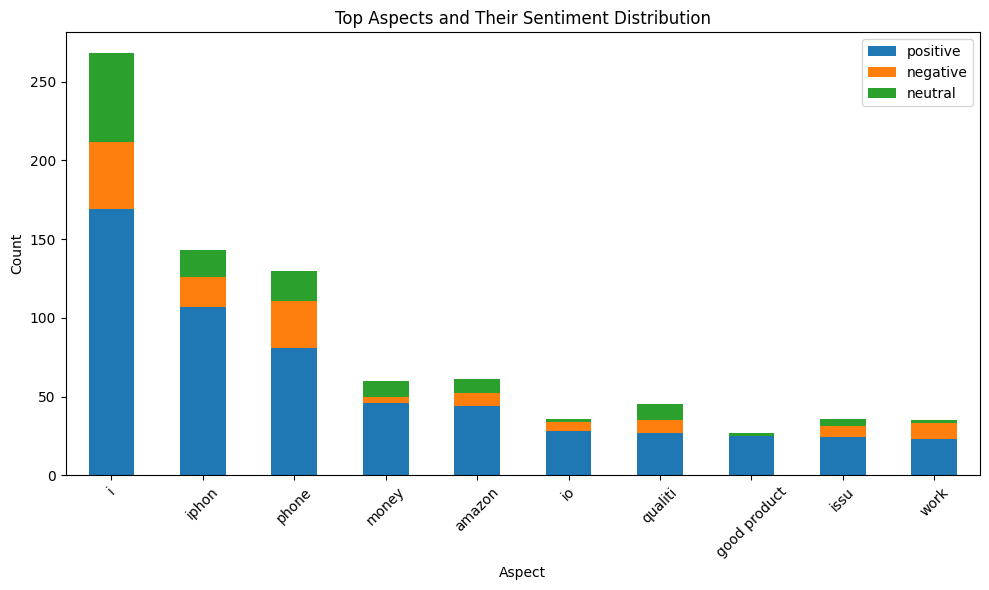

In [64]:
aspect_summary.head(10).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Top Aspects and Their Sentiment Distribution")
plt.ylabel("Count")
plt.xlabel("Aspect")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
aspect_df = df.explode('aspects')  # expand list of tuples into rows
aspect_df[['aspect', 'predicted_sentiment']] = pd.DataFrame(aspect_df['aspects'].tolist(), index=aspect_df.index)

In [66]:
from collections import Counter

# Step 1: Get majority sentiment per review based on aspects
def majority_sentiment(aspects):
    sentiments = [s for a, s in aspects]
    if sentiments:
        return Counter(sentiments).most_common(1)[0][0]
    return 'neutral'  # fallback

df['aspect_majority_sentiment'] = df['aspects'].apply(majority_sentiment)

# Step 2: Compare with review sentiment
comparison = pd.crosstab(df['sentiment'], df['aspect_majority_sentiment'])
print(comparison)

aspect_majority_sentiment  negative  neutral  positive
sentiment                                             
negative                        242      314       191
neutral                          30       98       106
positive                         49      913      1017


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2960 entries, 0 to 3061
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   country                    2960 non-null   object
 1   date                       2960 non-null   object
 2   isVerified                 2960 non-null   bool  
 3   ratingScore                2960 non-null   int64 
 4   variant                    2960 non-null   object
 5   review                     2960 non-null   object
 6   color                      2960 non-null   object
 7   size                       2960 non-null   object
 8   raw_text                   2960 non-null   object
 9   sentiment                  2960 non-null   object
 10  cleaned_review             2960 non-null   object
 11  sentiment_encoded          2960 non-null   int64 
 12  aspects                    2960 non-null   object
 13  aspect_majority_sentiment  2960 non-null   object
dtypes: bool(1), i

### Result Visualizations

In [68]:
pip install wordcloud

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

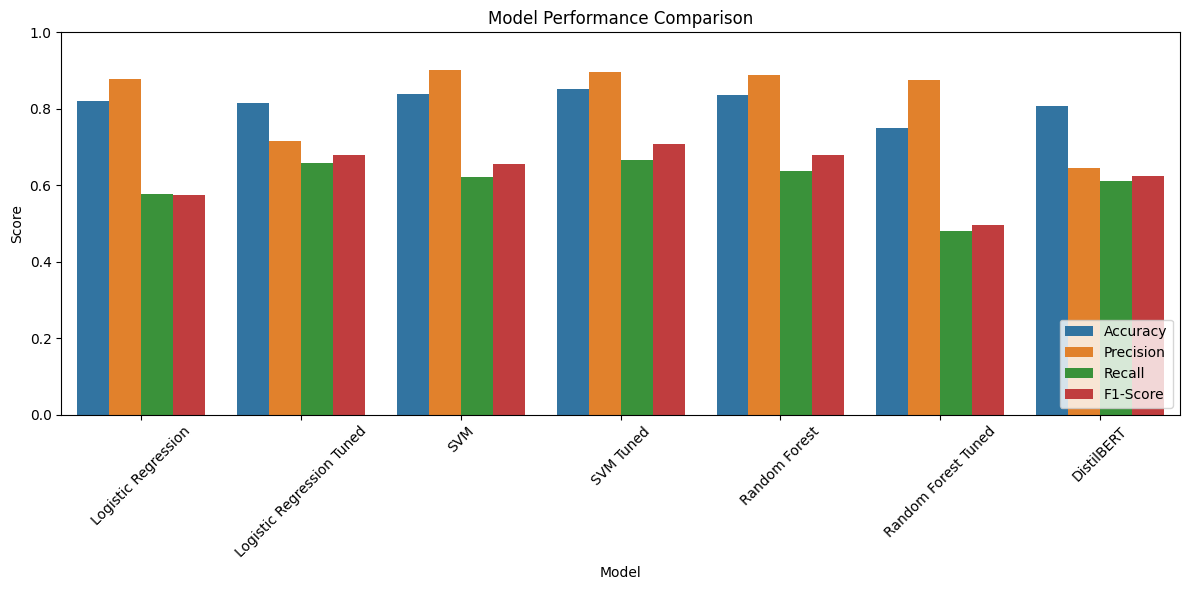

In [70]:
# Melt the DataFrame for easier plotting
df_melted = df_performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

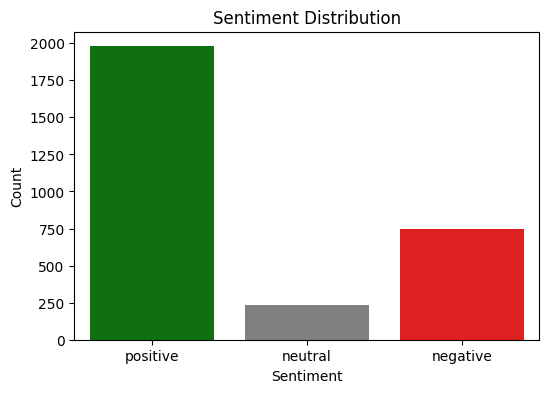

In [71]:
# sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette={
    'positive': 'green',
    'neutral': 'gray',
    'negative': 'red'
})
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

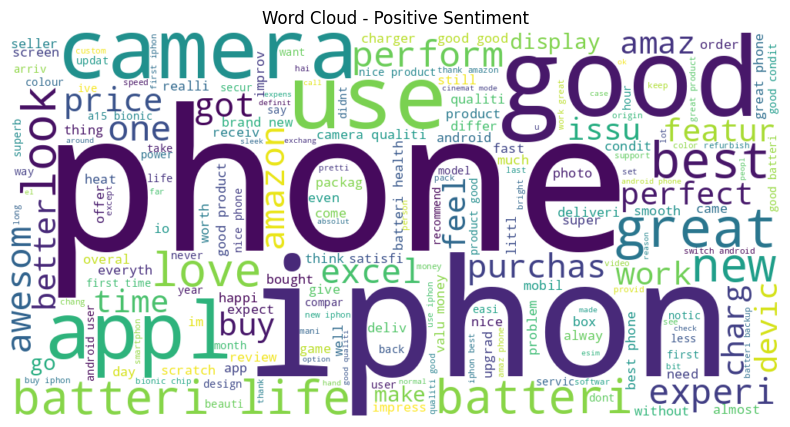

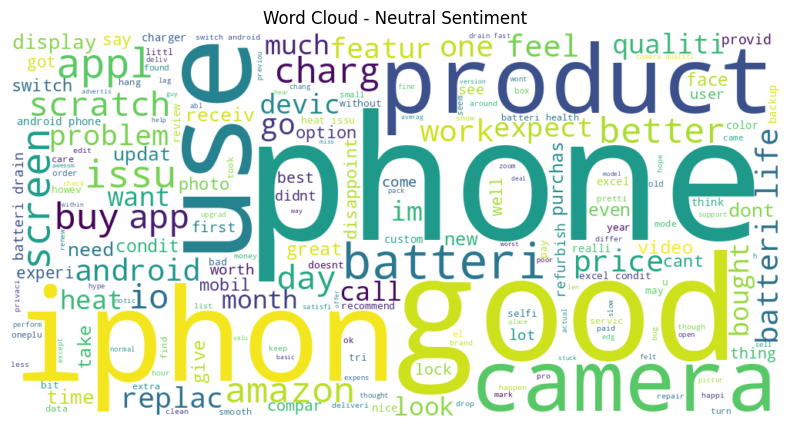

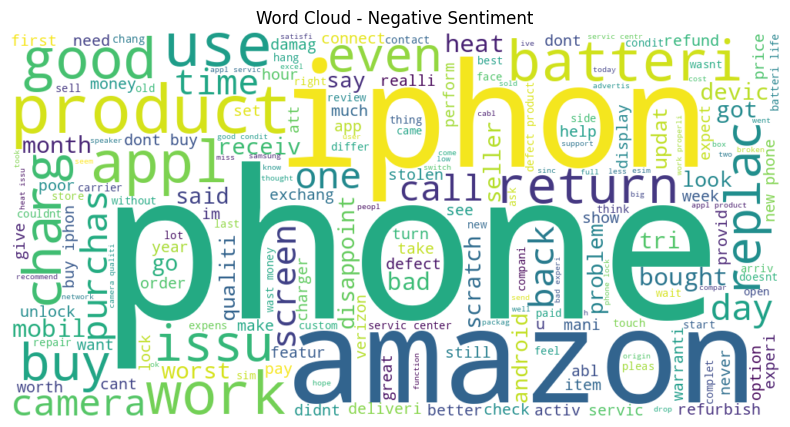

In [72]:
# wordcloud for aspects
for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_review'])
    wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {sentiment.capitalize()} Sentiment')
    plt.show()

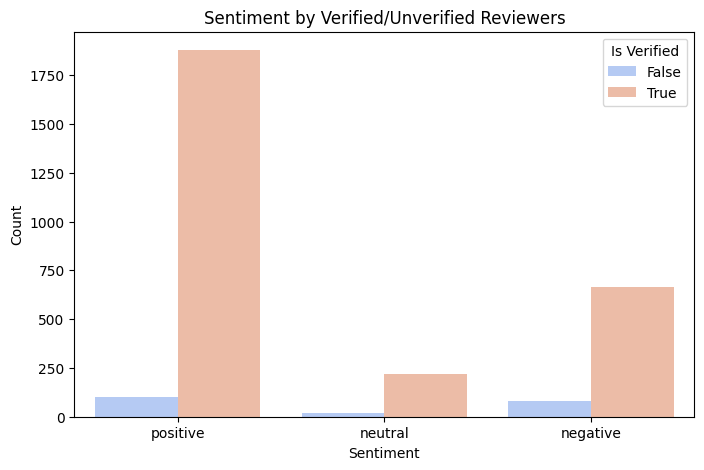

In [73]:
# sentiment by verified and unverified users
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', hue='isVerified', palette='coolwarm')
plt.title('Sentiment by Verified/Unverified Reviewers')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Is Verified')
plt.show()

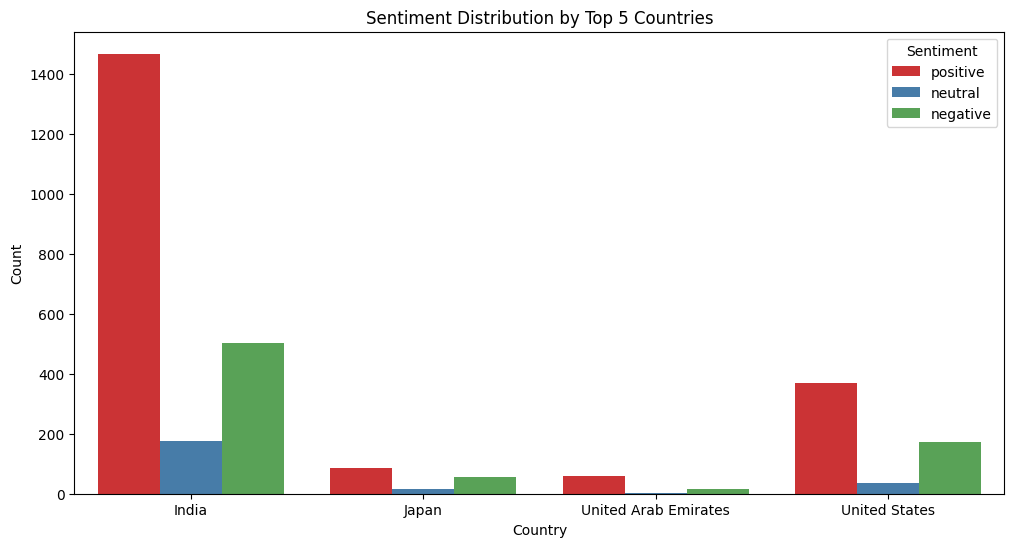

In [74]:
# top 5 countries
top_countries = df['country'].value_counts().nlargest(5).index
df_top_countries = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_countries, x='country', hue='sentiment', palette='Set1')
plt.title('Sentiment Distribution by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [75]:
print(df['color'].unique())

['Midnight' 'Pink' 'Blue' 'Green' 'Starlight' 'Red' 'Yellow' 'Black'
 'Purple' 'Midnight Black']


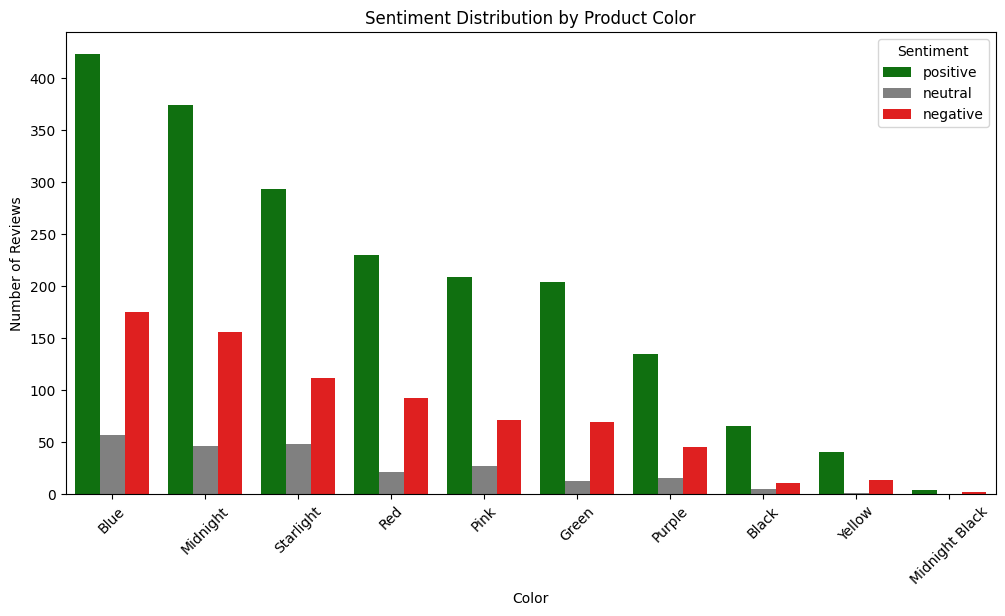

In [76]:
# sentiment by color
df_color = df.dropna(subset=['color'])

plt.figure(figsize=(12,6))
sns.countplot(data=df_color, x='color', hue='sentiment',
              palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'},
              order=df_color['color'].value_counts().index)
plt.title('Sentiment Distribution by Product Color')
plt.xlabel('Color')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [77]:
print(df['size'].unique())

['256GB' '128GB' '512GB']


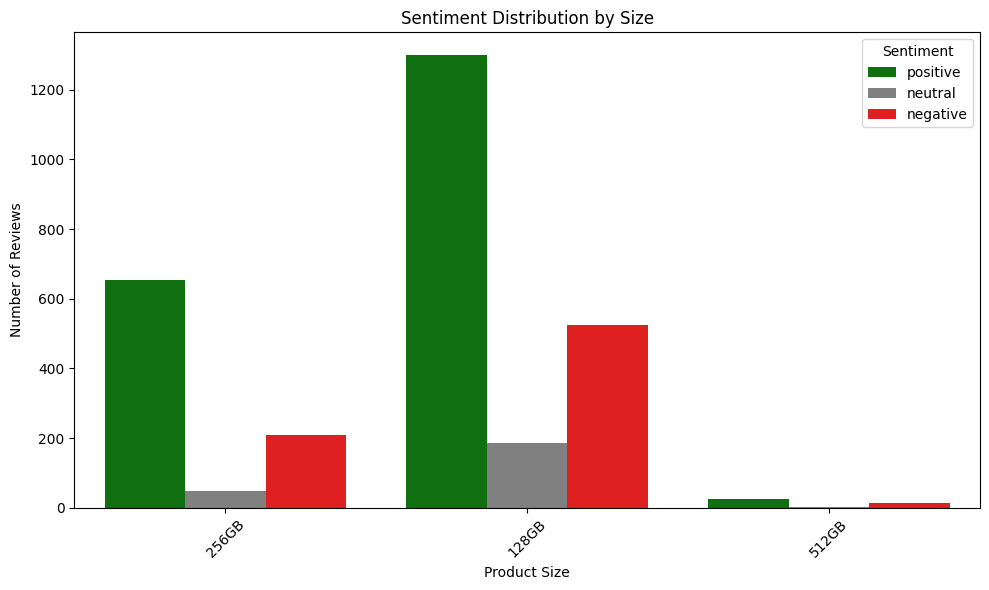

In [78]:
# sentiment by size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='size', hue='sentiment',
              palette={'positive': 'green', 'neutral': 'gray', 'negative': 'red'})
plt.title('Sentiment Distribution by Size')
plt.xlabel('Product Size')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()